In [69]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Reading the file

df = pd.read_csv('50_Startups.csv')

In [71]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [73]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [74]:
# Divide the data into dependents vs independents

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [75]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [76]:
y

array([192,262, 191,792, 191,050, 182,902, 166,188, 156,991, 156,123,
       155,753, 152,212, 149,760, 146,122, 144,259, 141,586, 134,307,
       132,603, 129,917, 126,993, 125,370, 124,267, 122,777, 118,474,
       111,313, 110,352, 108,734, 108,552, 107,404, 105,734, 105,008,
       103,282, 101,005, 99,938, 97,484, 97,428, 96,779, 96,713, 96,480,
       90,708, 89,949, 81,229, 81,006, 78,240, 77,799, 71,498, 69,759,
       65,200, 64,926, 49,491, 42,560, 35,673, 14,681])

In [77]:
# Feature Encoding - OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [78]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [79]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
len(X_train)

40

In [81]:
len(X_test)

10

In [82]:
X_test

array([[1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 44069.95, 51283.14, 197029.42],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 1.0, 86419.7, 153514.11, 0.0],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54]], dtype=object)

In [93]:
y_test

array([126,993, 71,498, 89,949, 81,229, 149,760, 108,552, 64,926, 49,491,
       122,777, 191,050])

In [83]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
X_test

array([[1, -1, -1, 0, -0, 0],
       [1, -1, -1, -1, -1, -1],
       [1, -1, -1, -1, -3, -0],
       [-1, -1, 1, -1, -2, -0],
       [1, -1, -1, 1, -1, 1],
       [-1, -1, 1, 0, -1, -1],
       [-1, -1, 1, -2, -0, -2],
       [-1, 1, -1, -2, -0, 1],
       [-1, -1, 1, 0, 1, -2],
       [-1, 1, -1, 2, -1, 2]])

In [85]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predictions

y_pred = regressor.predict(X_test)

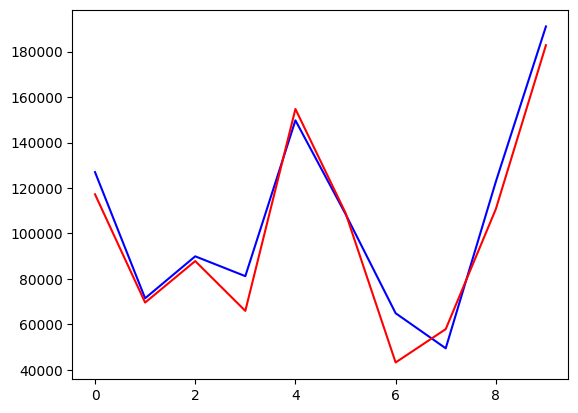

In [87]:
# Plotting of y_test vs y_pred

plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

Out of the box Predictions

In [88]:
data = [[1.0, 0.0, 0.0, 80000, 125000, 250000]]

new_df = pd.DataFrame(data)

In [89]:
new_df = sc.transform(new_df)

In [90]:
new_df

array([[1, -1, -1, 0, -0, 0]])

In [91]:
single = regressor.predict(new_df)

In [92]:
print(single)

[118,215]
